In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, metrics, cluster

%matplotlib inline

In [6]:
df = pd.read_csv("../input/onlineretail/OnlineRetail.csv", encoding='windows-1252')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
df.isna().any()

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

In [9]:
df = df[~df.CustomerID.isna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [10]:
df.nunique()

InvoiceNo      22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
UnitPrice        620
CustomerID      4372
Country           37
dtype: int64

In [11]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [12]:
df = df[df.Quantity>0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397924 non-null  object 
 1   StockCode    397924 non-null  object 
 2   Description  397924 non-null  object 
 3   Quantity     397924 non-null  int64  
 4   InvoiceDate  397924 non-null  object 
 5   UnitPrice    397924 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      397924 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [14]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [15]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [16]:
df.InvoiceDate = pd.to_datetime(df.InvoiceDate)

In [17]:
df["TotalPrice"] = df.Quantity * df.UnitPrice
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [18]:
last_date = df.InvoiceDate.max()
last_date

Timestamp('2011-12-09 12:50:00')

In [19]:
rfm = df.groupby("CustomerID").agg({
    "InvoiceDate": lambda values: (last_date - values.max()).days,
    "InvoiceNo" : lambda values: len(values),
    "TotalPrice": lambda values: np.sum(values)
})

rfm.head()

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12346.0,325,1,77183.60
12347.0,1,182,4310.00
12348.0,74,31,1797.24
12349.0,18,73,1757.55
12350.0,309,17,334.40


In [20]:
rfm.columns = ["recency", "frequency", "monetary"]
rfm.head()

,recency,frequency,monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,1,182,4310.00
12348.0,74,31,1797.24
12349.0,18,73,1757.55
12350.0,309,17,334.40


In [21]:
quantiles = np.arange(1, 6) * 20
quantiles

array([ 20,  40,  60,  80, 100])

In [22]:
rfm["r_score"] = np.digitize(rfm.recency, bins = np.percentile(rfm.recency, quantiles)
                           , right=True)

rfm["m_score"] = np.digitize(rfm.monetary, bins = np.percentile(rfm.monetary, quantiles)
                           , right=True)

rfm["f_score"] = np.digitize(rfm.frequency, bins = np.percentile(rfm.frequency, quantiles)
                           , right=True)

rfm["r_score"] = 4 - rfm["r_score"]

rfm["r_score"] = rfm["r_score"] + 1
rfm["f_score"] = rfm["f_score"] + 1
rfm["m_score"] = rfm["m_score"] + 1


rfm.head()

,recency,frequency,monetary,r_score,m_score,f_score
CustomerID,,,,,,
12346.0,325,1,77183.60,1,5,1
12347.0,1,182,4310.00,5,5,5
12348.0,74,31,1797.24,2,4,3
12349.0,18,73,1757.55,4,4,4
12350.0,309,17,334.40,1,2,2


In [23]:
rfm.sample(10, random_state=123)

,recency,frequency,monetary,r_score,m_score,f_score
CustomerID,,,,,,
13037.0,137,48,881.07,2,3,3
15864.0,21,20,1936.32,4,4,2
13848.0,91,5,1255.00,2,4,1
15274.0,3,47,716.57,5,3,3
17865.0,30,370,10526.32,4,5,5
17398.0,114,38,653.38,2,3,3
12945.0,287,23,462.95,1,2,2
16737.0,52,1,417.60,3,2,1
14796.0,0,1141,8022.49,5,5,5


In [24]:
scaler = preprocessing.StandardScaler()
X = rfm[["r_score", "f_score", "m_score"]].values
X = scaler.fit_transform(X.astype("float32"))
X

array([[-1.4252185 , -1.3840665 ,  1.4140506 ],
       [ 1.4030564 ,  1.4140533 ,  1.4140506 ],
       [-0.7181498 ,  0.01499338,  0.7070253 ],
       ...,
       [ 1.4030564 , -1.3840665 , -1.4140506 ],
       [ 1.4030564 ,  1.4140533 ,  1.4140506 ],
       [-0.01108105,  0.7145233 ,  0.7070253 ]], dtype=float32)

Text(0, 0.5, 'Inertia Score')

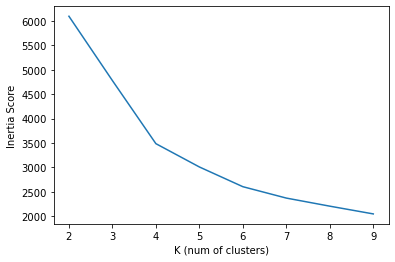

In [25]:
inertias = {}
for k in range(2, 10): 
    kmeans = cluster.KMeans(n_clusters=k, random_state=1)
    kmeans.fit(X)
    inertias[k] = kmeans.inertia_
    
pd.Series(inertias).plot()
plt.xlabel("K (num of clusters)")
plt.ylabel("Inertia Score")

In [26]:
k = 5
kmeans = cluster.KMeans(n_clusters=k, random_state = 1)
rfm["cluster"] = kmeans.fit_predict(X)

In [27]:
rfm.cluster.value_counts()

0    1136
1    1087
4     853
2     668
3     595
Name: cluster, dtype: int64

In [28]:
rfm["distance"] = 0.0
for i in range(k):
    centroid = kmeans.cluster_centers_[i].reshape(1, -1)
    cluster_points = X[rfm.cluster == i]
    rfm["distance"][rfm.cluster == i] = metrics.euclidean_distances(centroid, cluster_points).flatten()
rfm.sample(20)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value 

,recency,frequency,monetary,r_score,m_score,f_score,cluster,distance
CustomerID,,,,,,,,
13484.0,240,8,313.80,1,2,1,0,0.534153
13867.0,30,61,1015.29,4,4,4,1,0.697636
14056.0,0,1106,8214.65,5,5,5,1,0.540009
12920.0,16,28,164.23,4,1,2,3,0.520516
12658.0,18,36,686.05,4,3,3,2,0.029652
12446.0,57,58,1002.31,3,4,3,4,0.804260
17298.0,100,30,498.42,2,3,3,4,0.726112
13055.0,77,76,1214.41,2,4,4,4,0.291288
18276.0,43,14,335.86,3,2,1,3,0.715470


In [29]:
rfm.groupby("cluster").distance.agg(["mean", "count"])

,mean,count
cluster,,
0,0.755233,1136
1,0.673123,1087
2,0.835333,668
3,0.773771,595
4,0.892773,853
